<a href="https://colab.research.google.com/github/Klop4ikk/3int/blob/main/train_light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
!pip install pmdarima
!pip install numpy==1.26.4
!pip install keras-tuner



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from xgboost import XGBRegressor
import warnings
import requests
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from io import BytesIO
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import acf, adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA



warnings.filterwarnings("ignore")
%matplotlib inline

–í—ã–±–µ—Ä–∏—Ç–µ —Å–ø–æ—Å–æ–± –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö

In [2]:
url = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/train.xlsx"  # –°—Å—ã–ª–∫–∞ –¥–æ–ª–∂–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç—å raw
response = requests.get(url)
df_ts = pd.read_excel(BytesIO(response.content), engine='openpyxl')

df_ts = df_ts.sort_values(by='dt', ascending=True)

In [3]:
# df_ts = pd.read_excel('/content/drive/MyDrive/int/train.xlsx')

# –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

### –ø—Ä–æ—Å–º–æ—Ç—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [4]:
df_ts.head(15)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
0  2015-01-05             32900
1  2015-01-12             32500
2  2015-01-19             32000
3  2015-01-26             30700
4  2015-02-02             30300
5  2015-02-09             30300
6  2015-02-16             30100
7  2015-02-23             29400
8  2015-03-02             29200
9  2015-03-09             29000
10 2015-03-16             28700
11 2015-03-23             27800
12 2015-03-30             27200
13 2015-04-06             26600
14 2015-04-13             25700

In [5]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [6]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN
df_ts['dt'].isna().sum()

0

In [7]:
df_ts.describe()

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668

In [8]:
df_ts.shape

(400, 2)

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

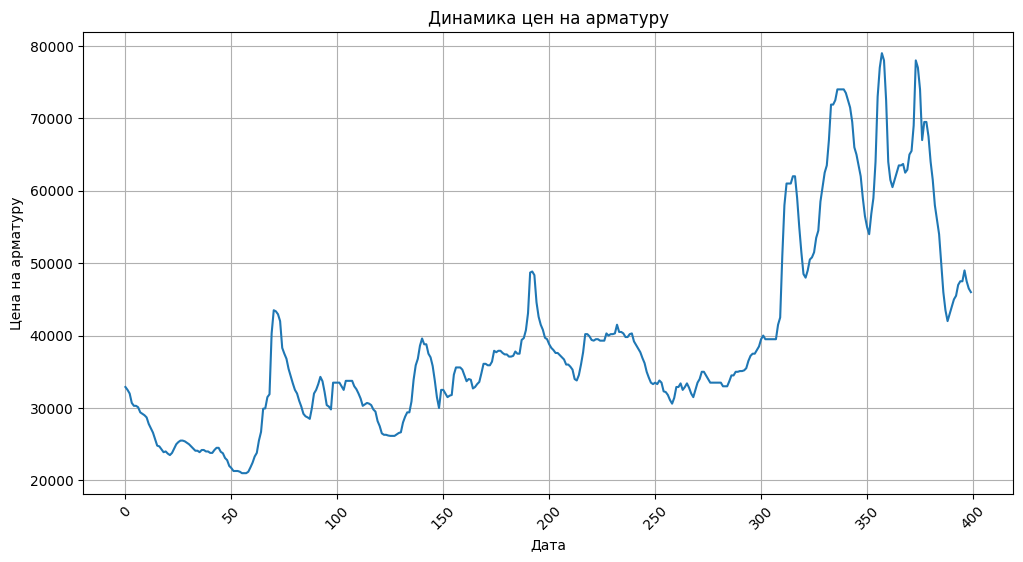

In [9]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(12, 6))
plt.plot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], marker='', linestyle='-')

# –ù–∞—Å—Ç—Ä–æ–∏–º –æ—Å–∏ –∏ –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–î–∏–Ω–∞–º–∏–∫–∞ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.grid(True)

# –£–ª—É—á—à–∏–º —á–∏—Ç–∞–µ–º–æ—Å—Ç—å –º–µ—Ç–æ–∫ –¥–∞—Ç
plt.xticks(rotation=45)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

**–í–æ–ø—Ä–æ—Å—ã –∫ –≥—Ä–∞—Ñ–∏–∫—É:**

 1.–ï—Å—Ç—å –ª–∏ —Ç—Ä–µ–Ω–¥?

 2.–ï—Å—Ç—å –ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å?

 3.–ù–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π —à—É–º?



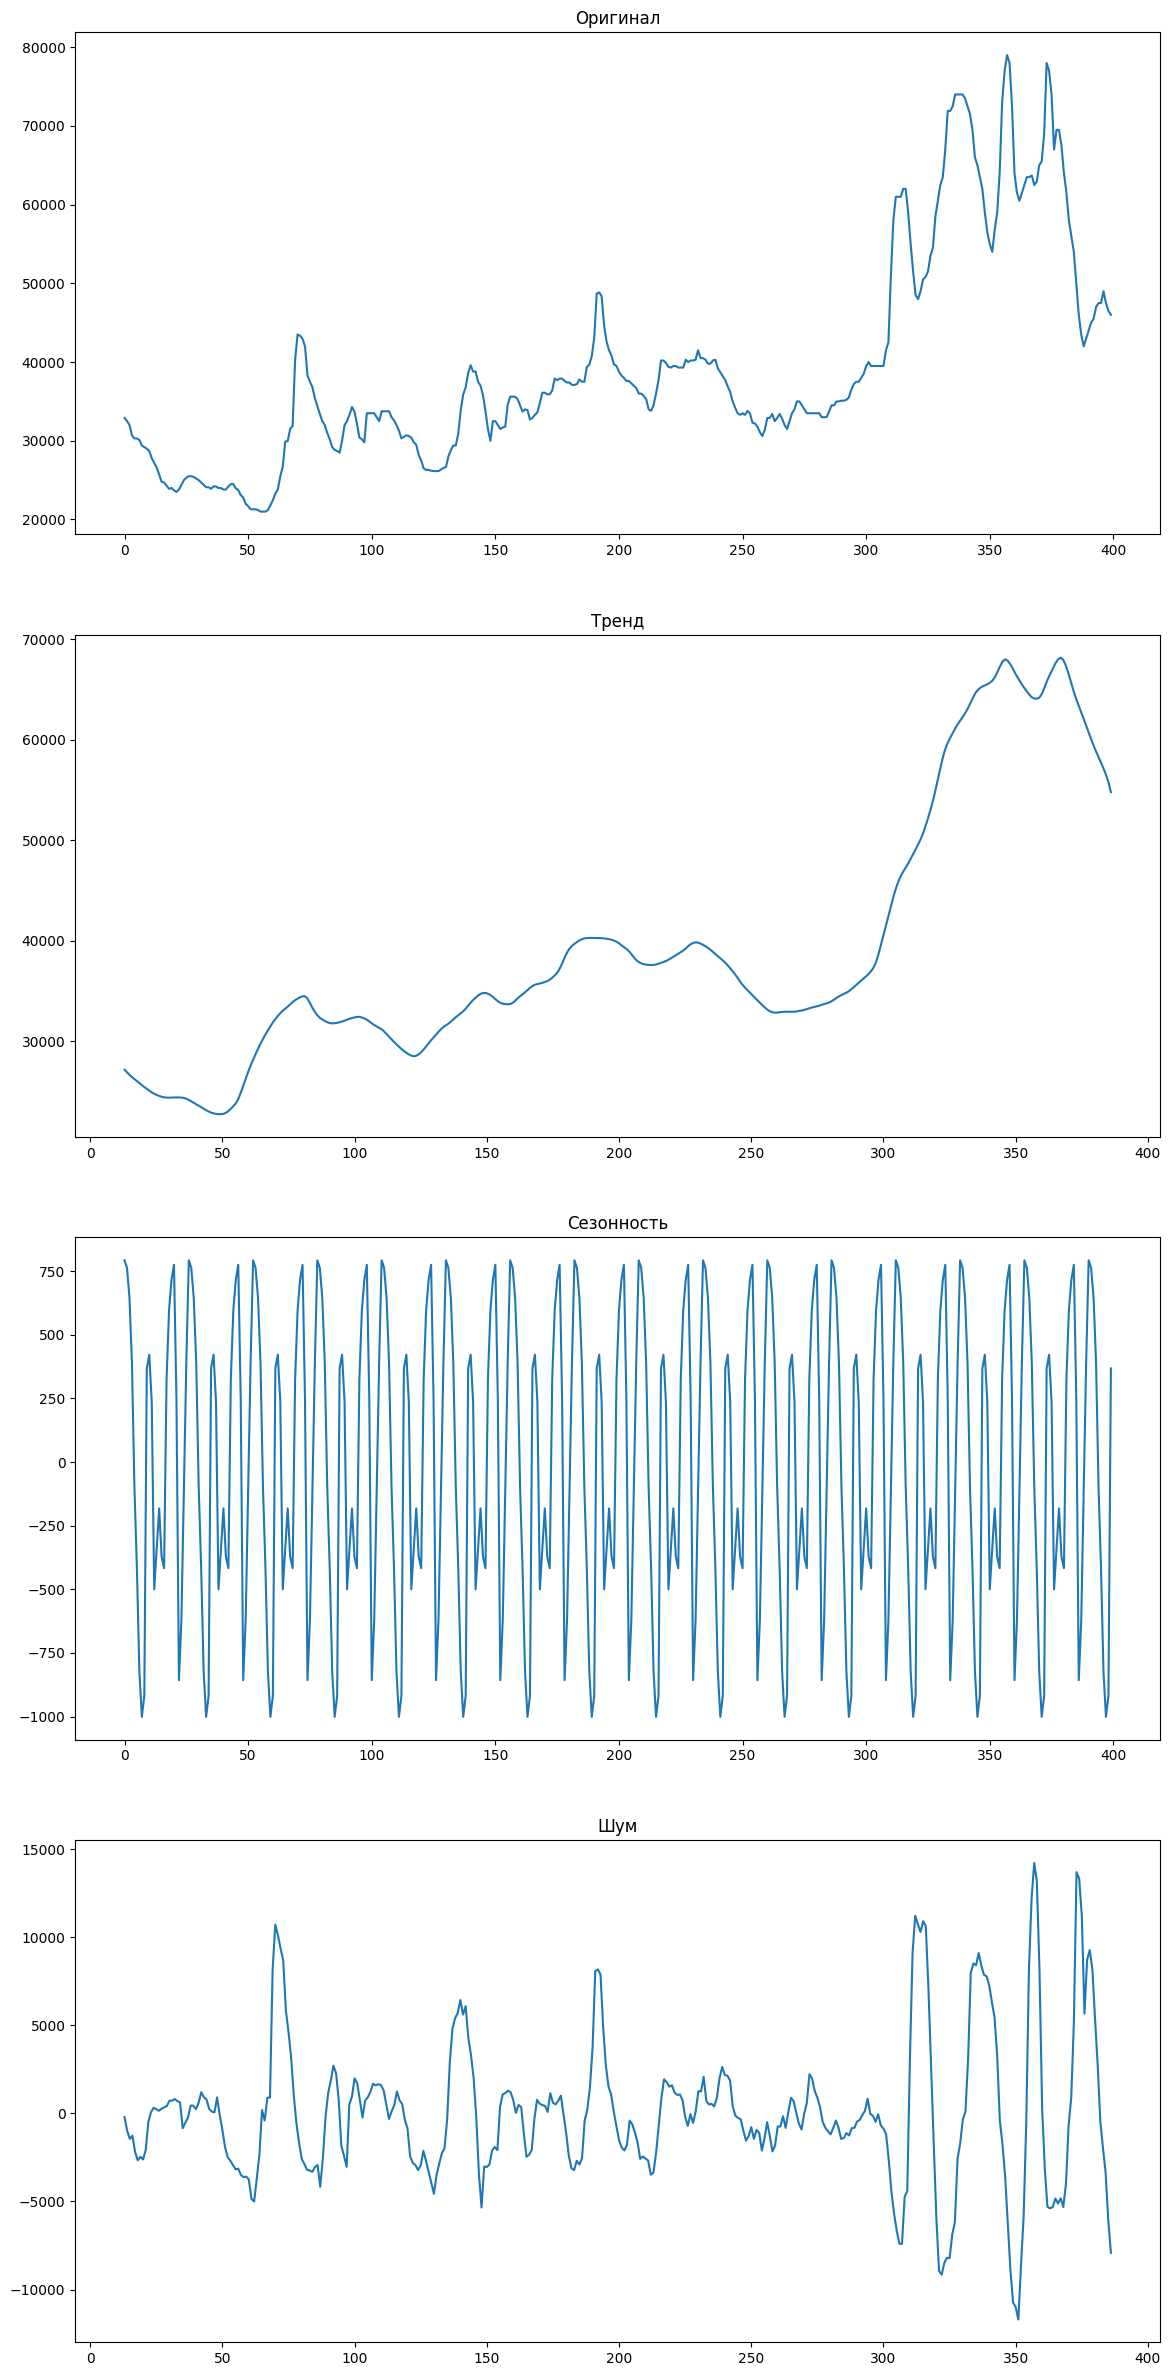

In [10]:
# –†–∞–∑–ª–æ–∂–∏–º —Ä—è–¥ –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 30))
decompose = seasonal_decompose(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'],period = 26)

ax[0].set_title('–û—Ä–∏–≥–∏–Ω–∞–ª')
ax[1].set_title('–¢—Ä–µ–Ω–¥')
ax[2].set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
ax[3].set_title('–®—É–º')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞


üîπ –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥  


–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —à—É–º.


 üìà –¢—Ä–µ–Ω–¥

   
–û–±—â–∏–π –≤–æ—Å—Ö–æ–¥—è—â–∏–π —Ç—Ä–µ–Ω–¥, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–π —Ä–æ—Å—Ç.


üîÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å


–í—ã—Ä–∞–∂–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, —Å–æ—Ö—Ä–∞–Ω—è—é—â–∏–µ—Å—è –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ —Ä—è–¥–∞.


 üîÄ –®—É–º  

–£–º–µ—Ä–µ–Ω–Ω—ã–π, –Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –±–ª–∏–∂–µ –∫ –∫–æ–Ω—Ü—É —Ä—è–¥–∞, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –∏–ª–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.


### –†–∞–±–æ—Ç–∞ —Å –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π

In [11]:
# –ü–æ–ª—É—á–∏–ª '—Å—ã—Ä—ã–µ' –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
acf(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"] ,nlags = 100, fft = False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023, 0.16166525, 0.15350675, 0.14370082, 0.13267574,
       0.12198755, 0.11231837, 0.10288107, 0.0929827 , 0.08286002,
       0.07336018, 0.06476539, 0.05709237, 0.05068118, 0.04473

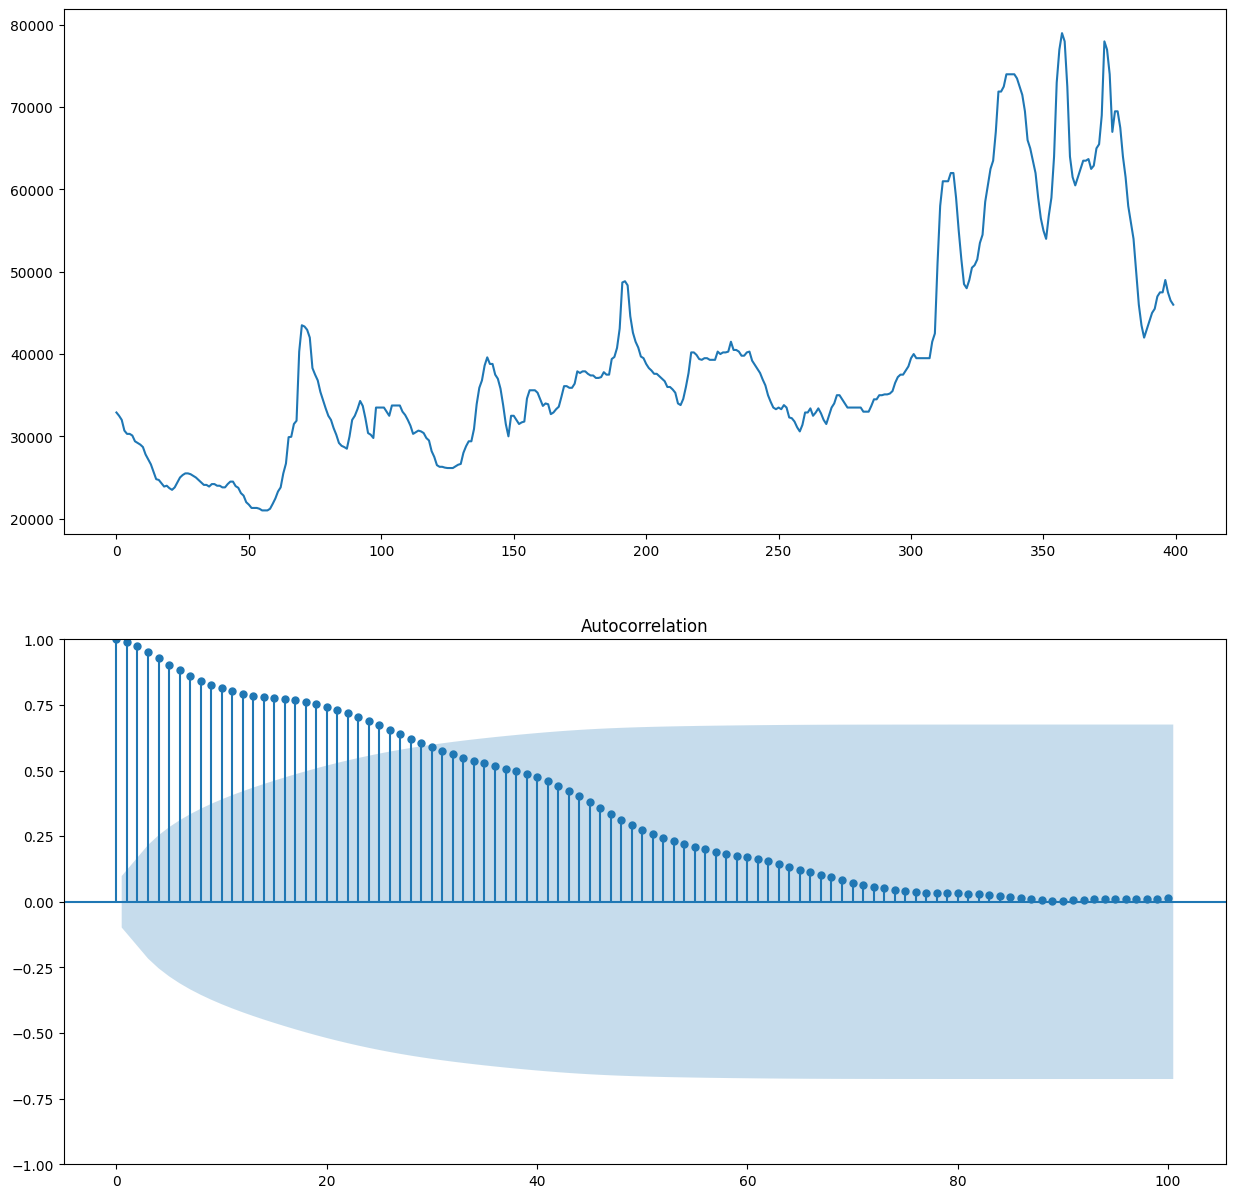

In [12]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax[0])
plot_acf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], lags=100, ax=ax[1]);

–í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –º–∞–ª—ã—Ö –ª–∞–≥–∞—Ö —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–µ–∫—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –ª–∞–≥–∞, —á—Ç–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è –º–Ω–æ–≥–∏—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.


–°–≤–µ—Ç–ª–æ-—Å–∏–Ω—è—è –æ–±–ª–∞—Å—Ç—å ‚Äì —ç—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: –∑–Ω–∞—á–µ–Ω–∏—è –≤–Ω—É—Ç—Ä–∏ –Ω–µ–≥–æ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã–º–∏.

In [13]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)


Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É')

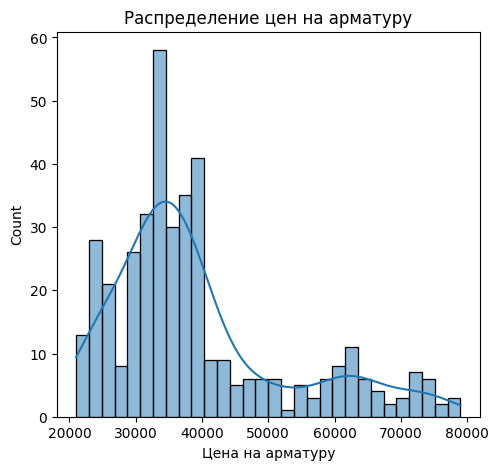

In [14]:
plt.figure(figsize=(12, 5))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
plt.subplot(1, 2, 1)
sns.histplot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")


–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –≤–∏–¥–µ–º —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π  –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ –º–µ–∂–¥—É 30—Ç—ã—Å –∏ 40—Ç—ã—Å

# –ú–æ–¥–µ–ª–∏

Epoch 1/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 156ms/step - loss: 0.1771 - val_loss: 0.0719
Epoch 2/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 75ms/step - loss: 0.0296 - val_loss: 0.1497
Epoch 3/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 78ms/step - loss: 0.0206 - val_loss: 0.0756
Epoch 4/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 64ms/step - loss: 0.0164 - val_loss: 0.0568
Epoch 5/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 83ms/step - loss: 0.0131 - val_loss: 0.0760
Epoch 6/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 89ms/step - loss: 0.0115 - val_loss: 0.0444
Epoch 7/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 158ms/step - loss: 0.0128 - val_loss: 0.0437
Epoch 8/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 178ms/step - loss: 0.0106 - val_loss: 0.0

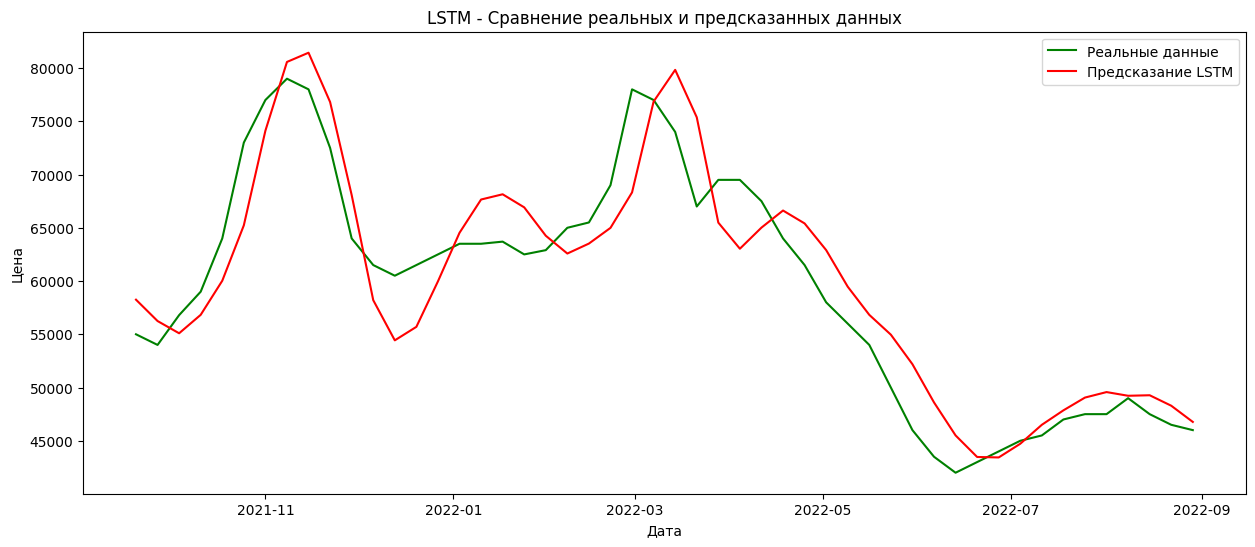

=== GRU ===
MAE: 2166.23
RMSE: 3128.88
R¬≤: 0.9152



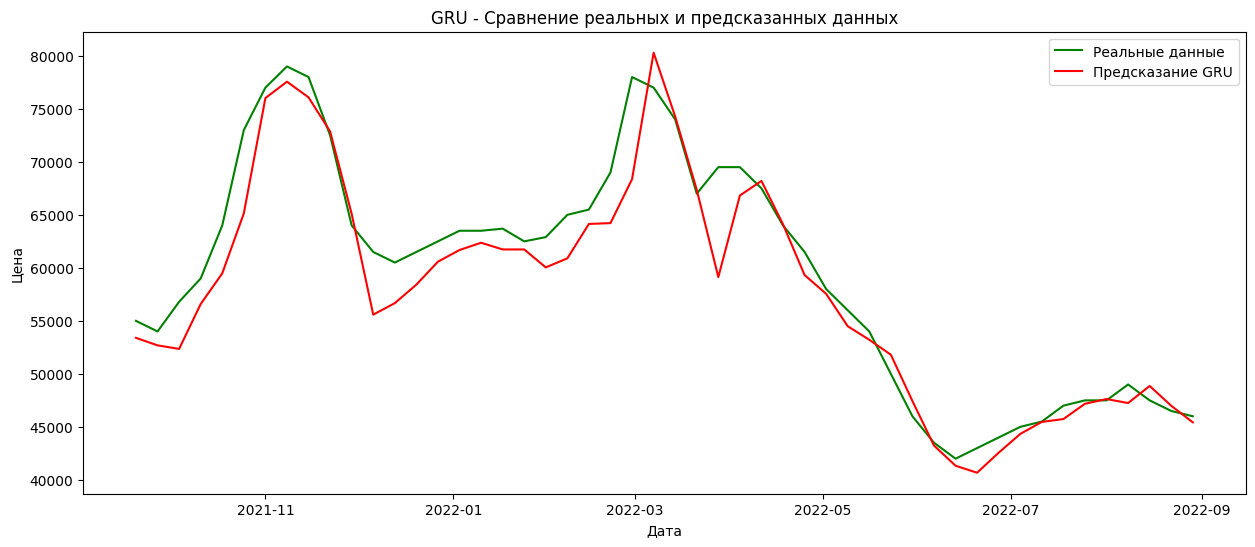

=== XGBoost ===
MAE: 10393.09
RMSE: 13081.78
R¬≤: -0.4819



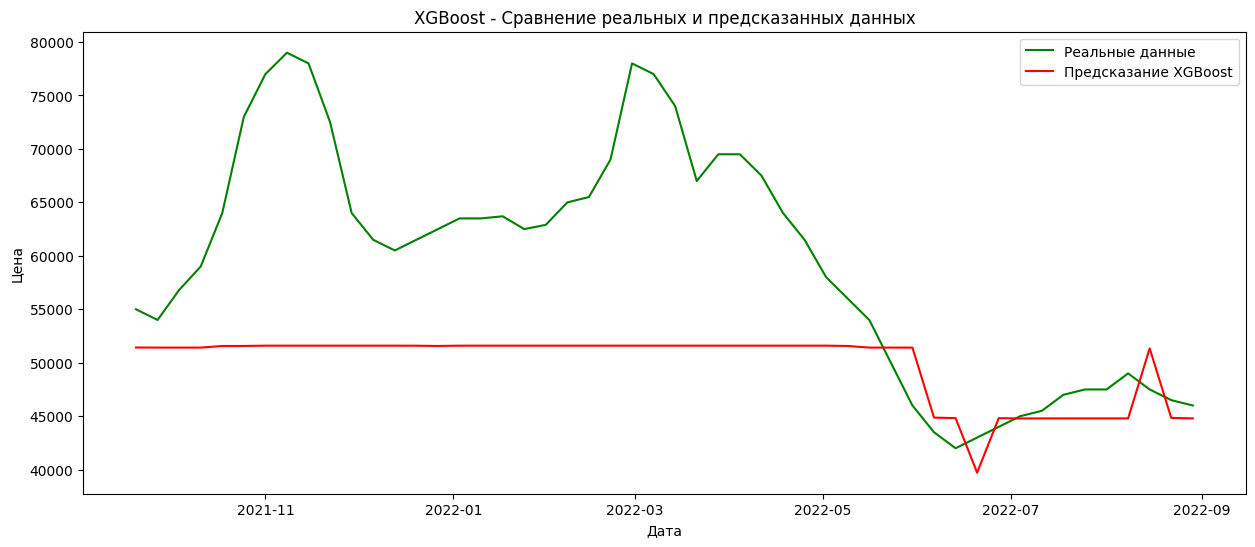

=== ARIMA ===
MAE: 18179.81
RMSE: 21029.39
R¬≤: -2.8295



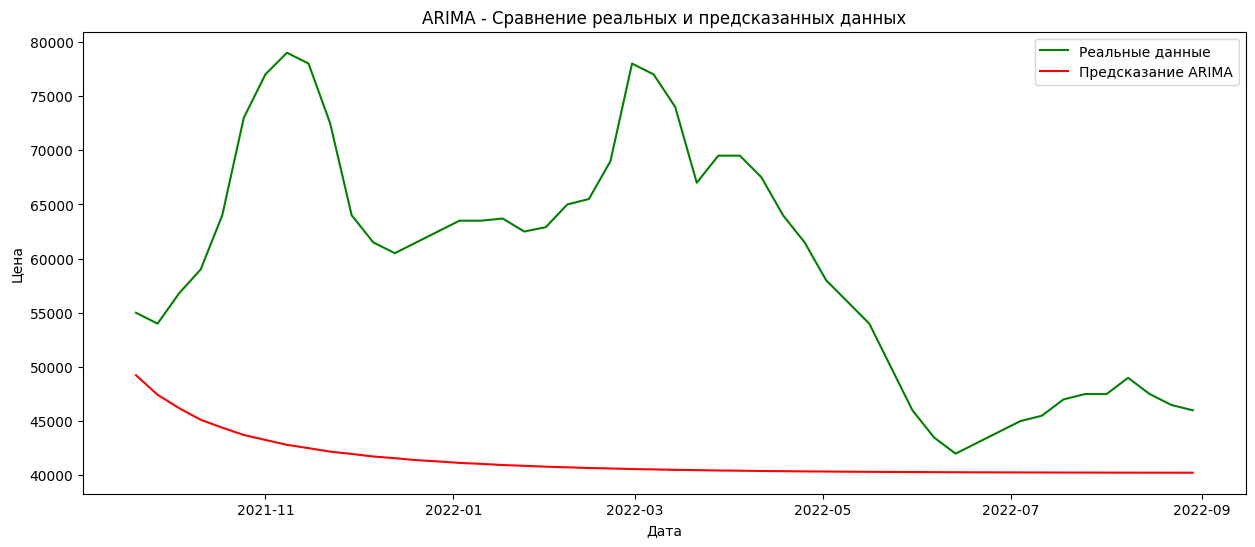


–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: GRU
MAE: 2166.23
RMSE: 3128.88
R¬≤: 0.9152


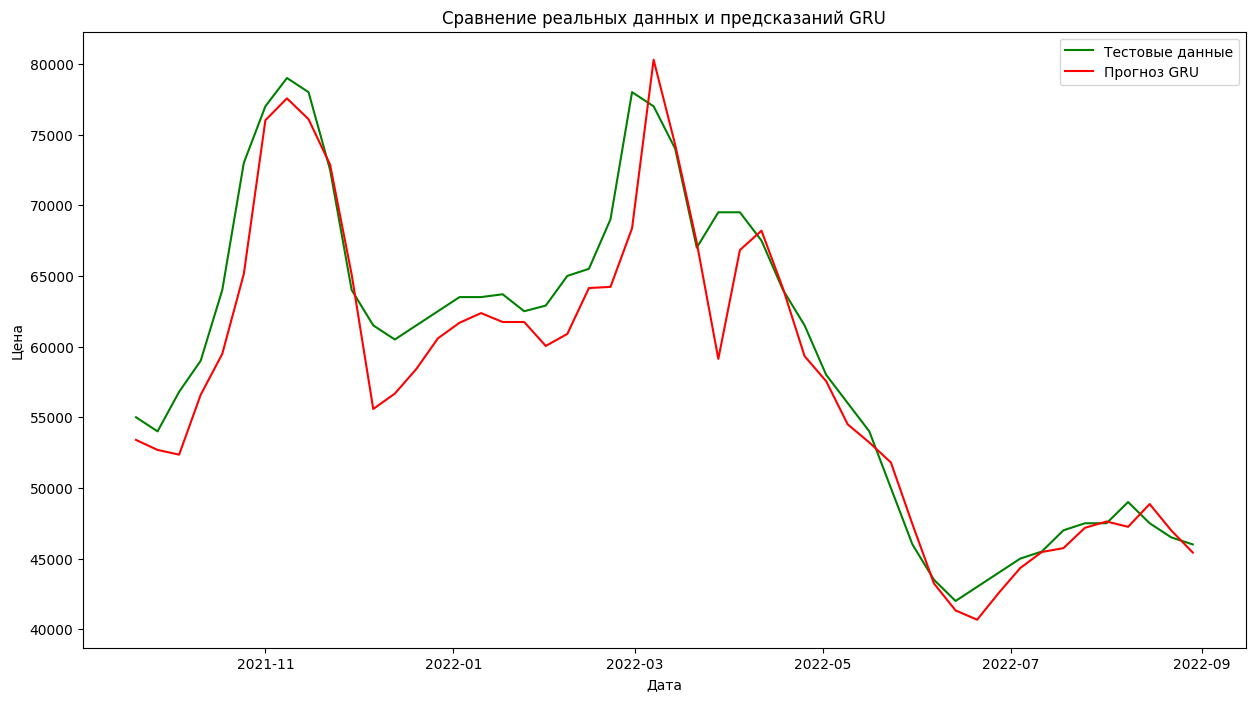

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ GRU_predictions.csv


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
import pickle
from joblib import dump
import warnings

# –ò–≥–Ω–æ—Ä–∏—Ä—É–µ–º –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è –¥–ª—è —á–∏—Å—Ç–æ—Ç—ã –≤—ã–≤–æ–¥–∞
warnings.filterwarnings('ignore')

# –§—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
def evaluate_model(y_true, y_pred, model_name, model_obj=None):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"=== {model_name} ===")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤: {r2:.4f}\n")

    plt.figure(figsize=(15, 6))
    plt.plot(test_data.index[time_step:][:len(y_true)], y_true, label="–†–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color="green")
    plt.plot(test_data.index[time_step:][:len(y_pred)], y_pred, label=f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ {model_name}", color="red")
    plt.title(f"{model_name} - –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö")
    plt.xlabel("–î–∞—Ç–∞")
    plt.ylabel("–¶–µ–Ω–∞")
    plt.legend()
    plt.show()

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å, –µ—Å–ª–∏ –ø–µ—Ä–µ–¥–∞–Ω–∞
    if model_obj is not None:
        if model_name in ["LSTM", "GRU"]:
            model_obj.save(f'{model_name}_model.h5')
        else:
            with open(f'{model_name}_model.pkl', 'wb') as f:
                pickle.dump(model_obj, f)

    return {'model': model_name, 'MAE': mae, 'RMSE': rmse, 'R¬≤': r2, 'predictions': y_pred}

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ df_ts —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç)
df_ts['dt'] = pd.to_datetime(df_ts['dt'])
df_ts.set_index('dt', inplace=True)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
train_data, test_data = train_test_split(df_ts, test_size=0.2, shuffle=False)

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É']])
test_scaled = scaler.transform(test_data[['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É']])

# –§—É–Ω–∫—Ü–∏—è —Å–æ–∑–¥–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –æ–∫–æ–Ω
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
time_step = 30
epochs = 50
batch_size = 32

# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–∏—Ö –∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape –¥–ª—è LSTM/GRU
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM –º–æ–¥–µ–ª—å
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
               validation_data=(X_test_lstm, y_test), verbose=1)

test_preds_lstm = scaler.inverse_transform(lstm_model.predict(X_test_lstm))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# GRU –º–æ–¥–µ–ª—å
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_step, 1)),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test_lstm, y_test), verbose=1)

test_preds_gru = scaler.inverse_transform(gru_model.predict(X_test_lstm))

# XGBoost –º–æ–¥–µ–ª—å
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')
xgb_model.fit(X_train_xgb, y_train.ravel())

test_preds_xgb = scaler.inverse_transform(xgb_model.predict(X_test_xgb).reshape(-1, 1))
y_test_xgb_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# ARIMA –º–æ–¥–µ–ª—å
train_series = pd.Series(train_scaled.flatten(), index=train_data.index)
test_series = pd.Series(test_scaled.flatten(), index=test_data.index)

p, d, q = 5, 1, 2
arima_model = ARIMA(train_series, order=(p, d, q))
arima_fit = arima_model.fit()

forecast_steps = len(test_series) - time_step
arima_pred = arima_fit.forecast(steps=forecast_steps)
test_values_for_eval = test_scaled[time_step:].flatten()

arima_pred_inverse = scaler.inverse_transform(arima_pred.values.reshape(-1, 1))
test_values_inverse = scaler.inverse_transform(test_values_for_eval.reshape(-1, 1))

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π
models_evaluation = [
    evaluate_model(y_test_rescaled, test_preds_lstm, "LSTM", lstm_model),
    evaluate_model(y_test_rescaled, test_preds_gru, "GRU", gru_model),
    evaluate_model(y_test_xgb_rescaled, test_preds_xgb, "XGBoost", xgb_model),
    evaluate_model(test_values_inverse, arima_pred_inverse, "ARIMA", arima_fit)
]

# –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_model = max(models_evaluation, key=lambda x: x['R¬≤'])
print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_model['model']}")
print(f"MAE: {best_model['MAE']:.2f}")
print(f"RMSE: {best_model['RMSE']:.2f}")
print(f"R¬≤: {best_model['R¬≤']:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
plt.figure(figsize=(15, 8))
plt.plot(test_data.index[time_step:][:len(y_test_rescaled)], y_test_rescaled,
         label='–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ', color='green')
plt.plot(test_data.index[time_step:][:len(best_model['predictions'])],
         best_model['predictions'], label=f'–ü—Ä–æ–≥–Ω–æ–∑ {best_model["model"]}', color='red')
plt.title(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π {best_model["model"]}')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–¶–µ–Ω–∞')
plt.legend()
plt.show()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
results_df = pd.DataFrame({
    '–î–∞—Ç–∞': test_data.index[time_step:][:len(best_model['predictions'])],
    '–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è': y_test_rescaled[:len(best_model['predictions'])].flatten(),
    f'–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è {best_model["model"]}': best_model['predictions'].flatten()
})
results_df.to_csv(f"{best_model['model']}_predictions.csv", index=False)
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {best_model['model']}_predictions.csv")
